In [19]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sym
import pandas as pd

def f(x, y): #25
  return y * np.sin(2 * x) - np.cos(7 * y)

def gradient_length(x, y):
  length = np.sqrt(x ** 2 + y ** 2)
  if abs(length) < 1e-9:
    length = 1e-7
  return length

def gradient_descent(x, y, search_for_min=1, h=0.1, epochs=100, step_d=0.9): # if searching for max -> search_for_min=-1
  z0 = f(x, y)
  path = [[x, y, z0]]
  F, _x, _y = sym.symbols("F _x _y")
  F = _y * sym.sin(2 * _x) - sym.cos(7 * _y)
  Fdx = sym.diff(F, _x)
  Fdy = sym.diff(F, _y)
  gradient = np.array([Fdx.subs(((_x, x), (_y, y))), Fdy.subs(((_x, x), (_y, y)))]).astype(np.float32)
  length = gradient_length(gradient[0], gradient[1])
  gradient /= length

  for i in range(epochs):
    z = f(x, y)
    if z * search_for_min > z0 * search_for_min:
      gradient = np.array([Fdx.subs(((_x, x), (_y, y))), Fdy.subs(((_x, x), (_y, y)))]).astype(np.float32)
      length = gradient_length(gradient[0], gradient[1])
      gradient /= length
      h *= step_d

    x -= gradient[0] * h * search_for_min
    y -= gradient[1] * h * search_for_min
    z0 = z

    path.append([x, y, f(x, y)])

  return path

def plot(X, Y, Z, grid, paths, path_in_points=False):
  fig = plt.figure(figsize=(15, 10))
  ax1 = fig.add_subplot(121, projection="3d")
  ax1.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.4);
  ax1.plot(grid[:, 0], grid[:, 1], grid[:, 2], "ko")
  for p in paths:
    is_in_range = np.all(np.c_[p[:, 0] >= -2, p[:, 0] <= 2, p[:, 1] >= -2, p[:, 1] <= 2], axis=1)
    p = p[is_in_range]
    if not path_in_points:
      ax1.plot(p[:, 0], p[:, 1], p[:, 2], "r-", lw=1)
    else:
      ax1.plot(p[:, 0], p[:, 1], p[:, 2], "ro", ms=2)
    if False not in is_in_range:
      ax1.plot(p[-1, 0], p[-1, 1], p[-1, 2], color="maroon", marker="o")

  ax2 = fig.add_subplot(122, projection="3d")
  ax2.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.8, zorder=0);
  ax2.plot(grid[:, 0], grid[:, 1], "ko", alpha=0.5, zorder=10)
  for p in paths:
    is_in_range = np.all(np.c_[p[:, 0] >= -2, p[:, 0] <= 2, p[:, 1] >= -2, p[:, 1] <= 2], axis=1)
    p = p[is_in_range]
    if not path_in_points:
      ax2.plot(p[:, 0], p[:, 1], "r-", alpha=0.5, zorder=10, lw=1)
    else:
      ax2.plot(p[:, 0], p[:, 1], "ro", alpha=1, zorder=10, ms=2)
    if False not in is_in_range:
      ax2.plot(p[-1, 0], p[-1, 1], p[-1, 2], color="maroon", marker="o", alpha=0.75, zorder=20)
  ax2.view_init(elev=90, azim=0, roll=0)

  plt.show()

def plot_only_function(X, Y, Z, grid=None, plot_line_on_zero=False):
  fig = plt.figure(figsize=(15, 10))
  ax1 = fig.add_subplot(121, projection="3d")
  ax1.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.4);
  if type(grid) != type(None):
    ax1.plot(grid[:, 0], grid[:, 1], grid[:, 2], "ko")
  if plot_line_on_zero:
    ax1.plot([-2, 2], [0, 0], [-1, -1], "k-", alpha=0.5, zorder=10)

  ax2 = fig.add_subplot(122, projection="3d")
  ax2.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.8, zorder=0);
  if type(grid) != type(None):
    ax2.plot(grid[:, 0], grid[:, 1], grid[:, 2], "ko", alpha=0.5, zorder=10)
  ax2.view_init(elev=90, azim=0, roll=0)
  if plot_line_on_zero:
    ax2.plot([-2, 2], [0, 0], [-1, -1], "k-", alpha=0.5, zorder=10)

  plt.show()

X, Y = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01))
Z = f(X, Y)

xx, yy = np.meshgrid(np.arange(-1.5, 2, 0.5), np.arange(-1.5, 2, 0.5))
grid = np.c_[xx.ravel(), yy.ravel(), f(xx.ravel(), yy.ravel())]

In [2]:
paths = []
for g in grid:
  paths.append(gradient_descent(g[0], g[1]))
paths = np.array(paths)

points = []
eps = 1e-1
for path in paths:
  p = path[-1]
  if p[0] >= -2 and p[0] <= 2 and p[1] >= -2 and p[1] <= 2:
    for i in range(len(points)):
      if np.mean(abs(points[i] - p)) < eps:
        points[i] = (points[i] + p) / 2
        break
    else:
      points.append(p)
points = np.array(np.round(points, 4))

In [3]:
paths_max = []
for g in grid:
  paths_max.append(gradient_descent(g[0], g[1], -1, h=0.2, epochs=150, step_d=0.95))
paths_max = np.array(paths_max)

points_max = []
eps = 1e-1
for path in paths_max:
  p = path[-1]
  if p[0] >= -2 and p[0] <= 2 and p[1] >= -2 and p[1] <= 2:
    for i in range(len(points_max)):
      if np.mean(abs(points_max[i] - p)) < eps:
        points_max[i] = (points_max[i] + p) / 2
        break
    else:
      points_max.append(p)
points_max = np.array(np.round(points_max, 4))

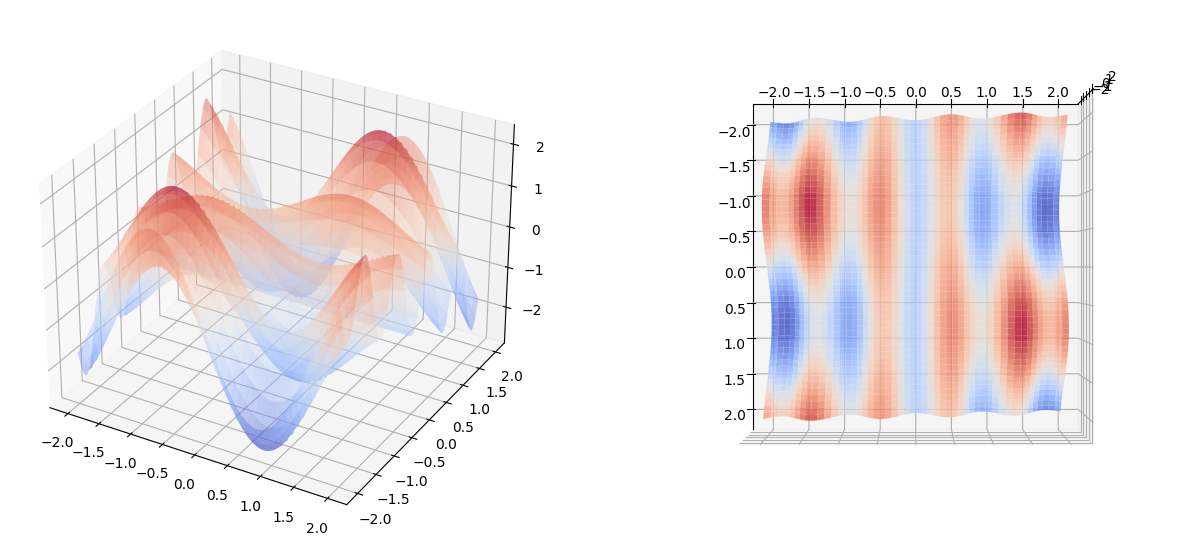

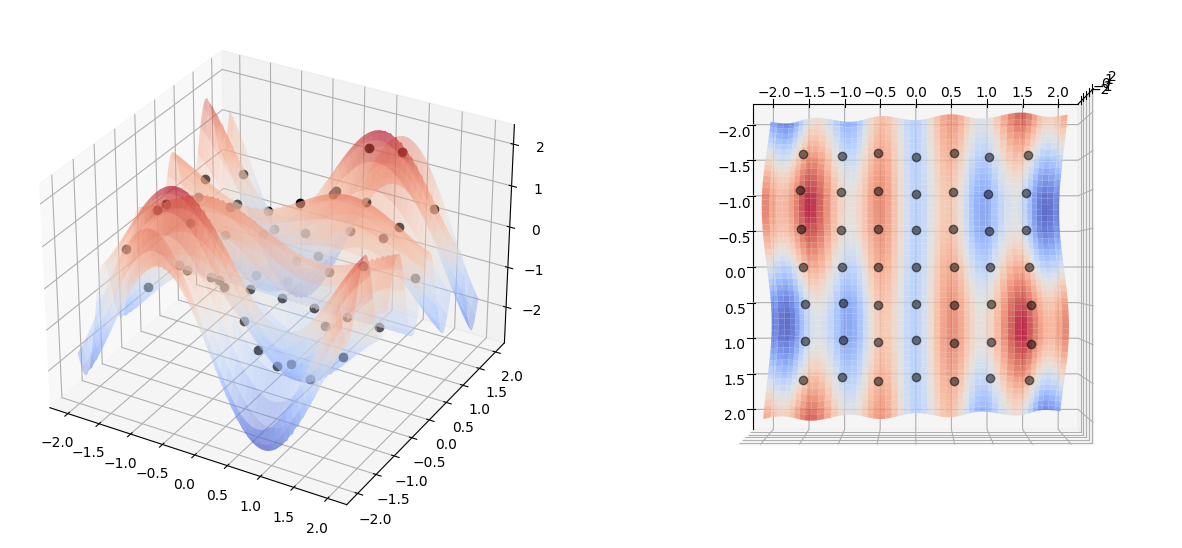

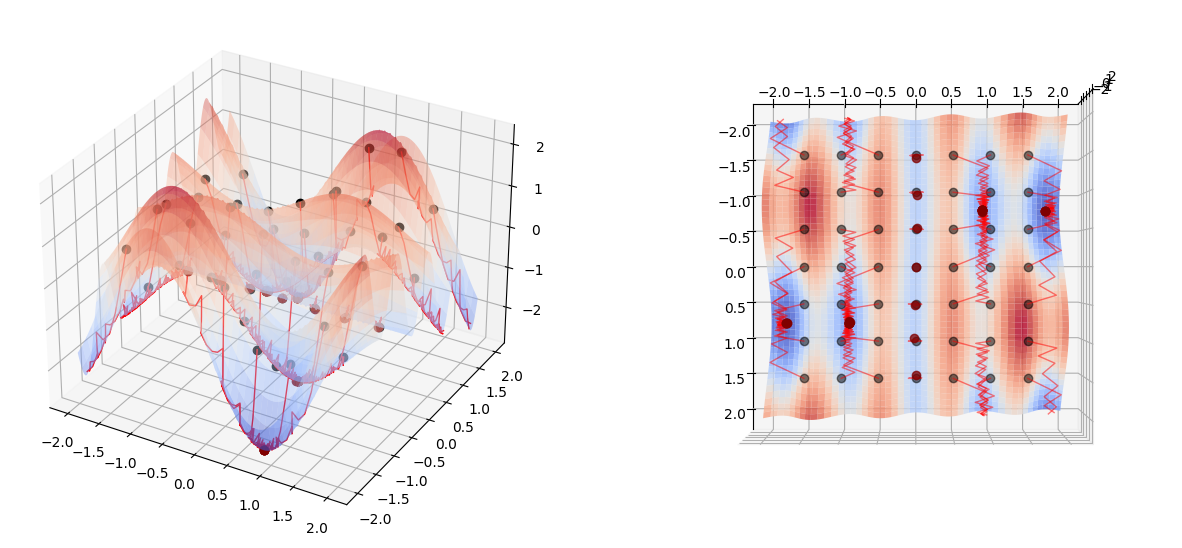

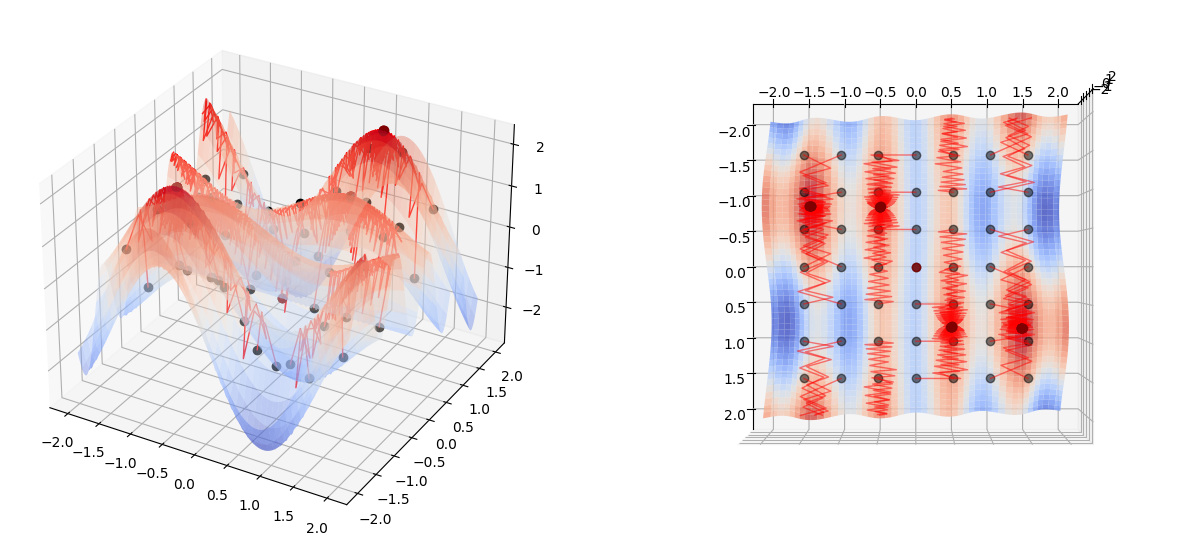

In [10]:
plot_only_function(X, Y, Z)
plot_only_function(X, Y, Z, grid)
plot(X, Y, Z, grid, paths)
plot(X, Y, Z, grid, paths_max)

In [11]:
final_min = points[abs(points[:, 1]) > 1e-1]
final_max = points_max[points_max[:, 2] > 0]

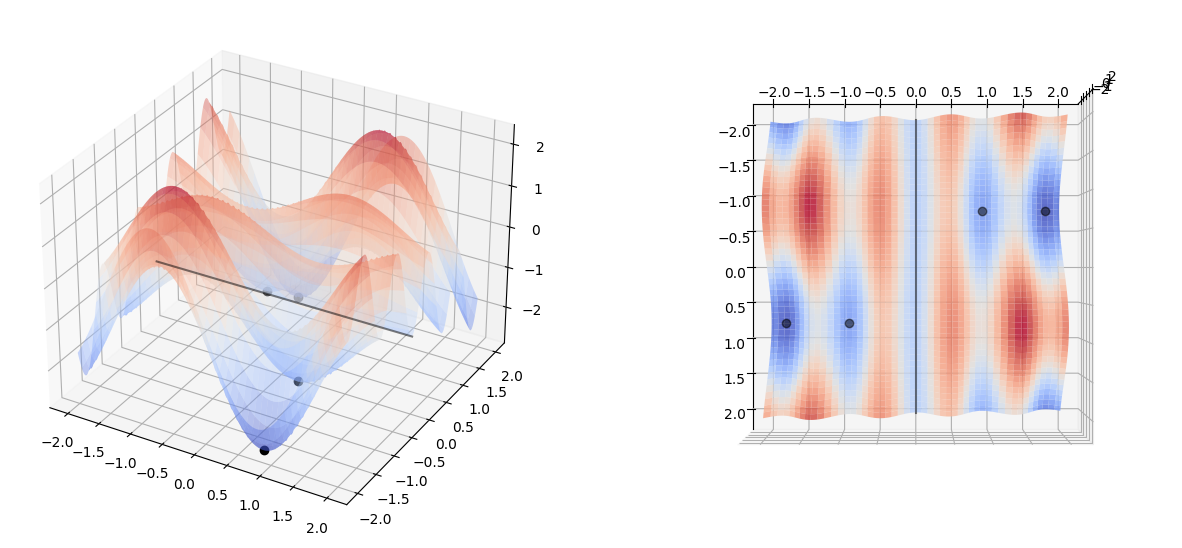

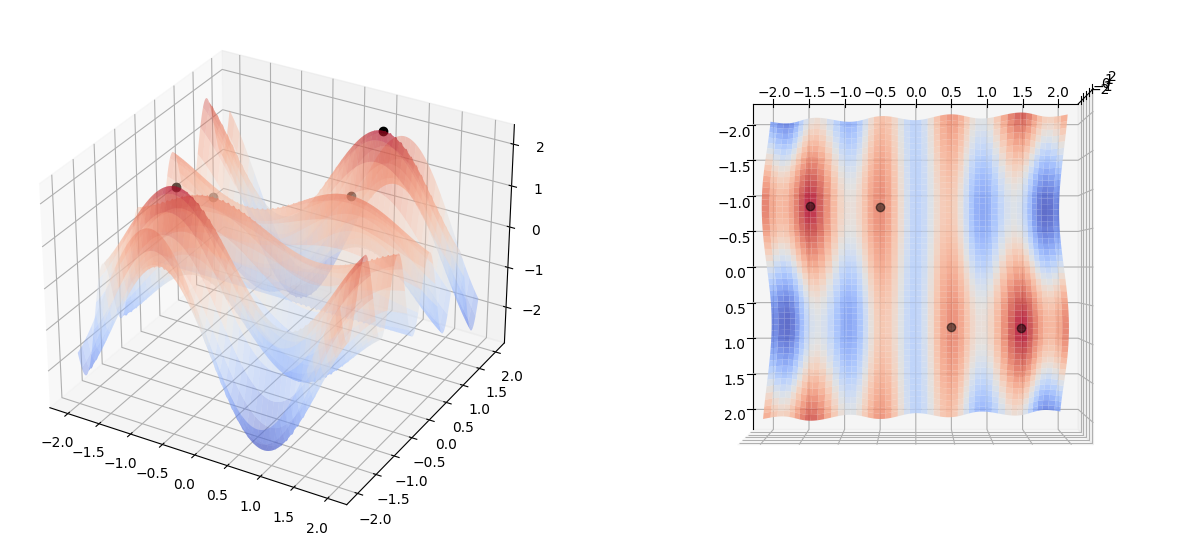

In [20]:
plot_only_function(X, Y, Z, final_min, True)
plot_only_function(X, Y, Z, final_max)

In [ ]:
# Reikšmių lentelėms generavimas
df_grid = pd.DataFrame({"X": grid[:, 0],
                   "Y": grid[:, 1],
                   "(x, y)": [f"({i}, {j})" for i, j in zip(grid[:, 0], grid[:, 1])]})
df_grid = pd.pivot_table(df_grid, index=["X"], columns=["Y"], values=["(x, y)"], aggfunc=lambda x:''.join(x))

final_points = np.round(paths[:, -1, :2], 4)
final_points_max = np.round(paths_max[:, -1, :2], 4)
df_final_points = pd.DataFrame({"T": [f"({i}, {j})" for i, j in zip(grid[:, 0], grid[:, 1])],
                   "min": [f"({i}, {j})" for i, j in zip(final_points[:, 0], final_points[:, 1])],
                   "max": [f"({i}, {j})" for i, j in zip(final_points_max[:, 0], final_points_max[:, 1])]})

df_min = pd.DataFrame({"T": [f"({i}, {j})" for i, j in zip(points[:, 0], points[:, 1])],
                   "Z": points[:, 2]})

df_max = pd.DataFrame({"T": [f"({i}, {j})" for i, j in zip(points_max[:, 0], points_max[:, 1])],
                   "Z": points_max[:, 2]})

In [ ]:
df_grid

(x, y)                                                        \
Y             -1.5          -1.0          -0.5          0.0          0.5   
X                                                                          
-1.5  (-1.5, -1.5)  (-1.5, -1.0)  (-1.5, -0.5)  (-1.5, 0.0)  (-1.5, 0.5)   
-1.0  (-1.0, -1.5)  (-1.0, -1.0)  (-1.0, -0.5)  (-1.0, 0.0)  (-1.0, 0.5)   
-0.5  (-0.5, -1.5)  (-0.5, -1.0)  (-0.5, -0.5)  (-0.5, 0.0)  (-0.5, 0.5)   
 0.0   (0.0, -1.5)   (0.0, -1.0)   (0.0, -0.5)   (0.0, 0.0)   (0.0, 0.5)   
 0.5   (0.5, -1.5)   (0.5, -1.0)   (0.5, -0.5)   (0.5, 0.0)   (0.5, 0.5)   
 1.0   (1.0, -1.5)   (1.0, -1.0)   (1.0, -0.5)   (1.0, 0.0)   (1.0, 0.5)   
 1.5   (1.5, -1.5)   (1.5, -1.0)   (1.5, -0.5)   (1.5, 0.0)   (1.5, 0.5)   

                                
Y             1.0          1.5  
X                               
-1.5  (-1.5, 1.0)  (-1.5, 1.5)  
-1.0  (-1.0, 1.0)  (-1.0, 1.5)  
-0.5  (-0.5, 1.0)  (-0.5, 1.5)  
 0.0   (0.0, 1.0)   (0.0, 1.5)  
 0.5   (0.5, 1.0)   (0.5, 1.5)  
 1.0   (1.0, 1.0)   (1.0, 1.5)  
 1.5   (1.5, 1.0)   (1.5, 1.5)

In [ ]:
df_final_points

,T,min,max
0,"(-1.5, -1.5)","(-2.3562, -1.8168)","(-0.7854, -1.3558)"
1,"(-1.0, -1.5)","(-2.3562, -1.8207)","(-0.7854, -1.3738)"
2,"(-0.5, -1.5)","(0.7854, -1.8176)","(-0.7854, -1.3483)"
3,"(0.0, -1.5)","(0.7854, -1.8121)","(-0.7854, -1.3569)"
4,"(0.5, -1.5)","(0.7854, -1.8132)","(-0.7854, -1.3631)"
5,"(1.0, -1.5)","(0.7854, -1.8166)","(2.3562, -1.3641)"
6,"(1.5, -1.5)","(0.7854, -1.8127)","(2.3562, -1.3578)"
7,"(-1.5, -1.0)","(-2.3557, -0.9187)","(-0.7854, -1.3526)"
8,"(-1.0, -1.0)","(-2.2767, -0.9073)","(-0.7854, -1.3719)"
9,"(-0.5, -1.0)","(0.7513, -0.9202)","(-0.7854, -1.351)"


In [ ]:
df_min

,T,Z
0,"(0.7854, -1.814)",-2.8053
1,"(0.7851, -0.9176)",-1.9078
2,"(-1.4839, 0.002)",-1.0002
3,"(-0.9744, 0.0215)",-1.0087
4,"(-0.5303, 0.0169)",-1.0078
5,"(0.0, 0.0)",-1.0000
6,"(0.5303, -0.0169)",-1.0078
7,"(0.9744, -0.0215)",-1.0087
8,"(1.4839, -0.002)",-1.0002
9,"(-0.768, 0.9194)",-1.9067


In [ ]:
df_max

,T,Z
0,"(-0.7854, -1.3633)",2.3541
1,"(-0.7847, -0.4644)",1.4581
2,"(0.0, 0.0)",-1.0000
3,"(0.7877, 0.4624)",1.4547
4,"(0.7854, 1.3598)",2.3535
